# Prior to poserior updating with Poisson data

We are  given that $Z \sim Gamma(a,b)$, that is 

$$g(z) = \frac{b^a}{\Gamma(a)} z^{a-1} exp(-bz) \qquad 0<z<\infty$$

## (a) 

Find expected value and variance for the gamma distribution.

\begin{align*}
E(z) &= \int_{0}^{\infty} z \frac{b^a}{\Gamma(a)} z^{a-1} exp(-bz) dz \\
&= \frac{b^a}{\Gamma(a)} \int_{0}^{\infty} z^a exp(-bz) dz, \quad c = bz \\
&= \frac{b^a}{\Gamma(a)} \int_{0}^{\infty} \left(\frac{c}{b}\right)^a exp(-c) \frac{dc}{b} \\
&= \frac{b^a}{\Gamma(a)} \frac{1}{b^{a+1}} \int_{0}^{\infty} c^{a+1-1} exp(-c) dc, \quad \text{gamma function} \\
&= \frac{\Gamma(a+1)}{b\Gamma(a)} \\
&= \frac{a\Gamma(a)}{b\Gamma(a)} \\
&= \frac{a}{b}
\end{align*}

\begin{align*}
Var(z) &= E(z^2) - (E(z))^2 \\
&= \int_{0}^{\infty} z^2 \frac{b^a}{\Gamma(a)} z^{a-1} exp(-bz) dz - \left(\frac{a}{b}\right)^2 \\
&= \frac{b^a}{\Gamma(a)} \int_{0}^{\infty} \left(\frac{c}{b}\right)^{a+1} exp(-c) \frac{dc}{b} - \frac{a^2}{b^2} \\
&= \frac{b^a}{\Gamma(a)} \frac{1}{b^{a+2}} \int_{0}^{\infty} c^{a+2-1} exp(-c) dc - \frac{a^2}{b^2} \\
&= \frac{\Gamma(a+2)}{b^2\Gamma(a)} - \frac{a^2}{b^2} \\
&= \frac{(a+1)a - a^2}{b^2} \\
&= \frac{a}{b^2} \\
&= \frac{E(Z)}{b}
\end{align*}

## (b)

Now suppose we have the model/likelihood 

$$y|\theta \sim Poisson(\theta)$$

and prior distribution

$$\theta \sim Gamma(a,b)$$

Show that our posterior distribution is 

$$\theta | y \sim Gamma(a+y, b+1)$$

To solve this problem, I will use Bayes Theorem:

$$\pi(\theta | y) = \frac{f(y,\theta)}{f_{marg}(y)} = \frac{p(\theta)f(y|\theta)}{f_{marg}(y)}$$

The different functions in the formula is:

* $p(\theta)$: Our prior knowledge. What we know (or rather think we know) before we get any observations
* $f(y|\theta)$: Our model/likelihood, here with only one observation (only one y). This is how we think our data is distributed.
* $f_{marg}(y)$: Our marginal distribution. The marginal distribution represent all possible outcomes. 
    - $f_{marg}(y) = \int_\theta p(\theta) f(y|\theta) d\theta$ (here, our integral would be from 0 to $\infty$)
    
Lets find the posterior distributions:

\begin{align*}
\pi(\theta|y) &= \frac{1}{f_{marg}(y)} p(\theta)f(y|\theta) \\
&= \frac{1}{f_{marg}(y)} \cdot \frac{b^a}{\Gamma(a)} \theta^{a-1} exp(-b\theta) \cdot \frac{1}{y!} \theta^y exp(-\theta) \\
&\propto \theta^{a+y-1} exp(-\theta(b+1))
\end{align*}

This resembles a Gamma distribution, thus our posterior will be:

$$\theta|y \sim Gamma(a+y, b+1)$$

Notice that we did not use $f_{marg}(y)$ to find the posterior distribution. This is because our marginal is considered as a constant. Same thing applies to $\frac{b^a}{\Gamma(a)}$ and $\frac{1}{y!}$. We do not need to use these constants to find the unnormalized version of the posterior. We can also calcualte the normalized posterior distribution, but we would just end up with $\theta|y \sim Gamma(a+y, b+1)$. Often we do not need to find the constants because we can just find it by simulation (e.g. MCMC which we'll come later).

## (c)

Now we have repeated Poisson observations $y_1, ... , y_n$, being i.i.d. $\sim$ Pois$(\theta)$ for given $\theta$ (the given $\theta$ is $Gamma(a,b)$ distributed).

So we have the same prior as from b)

$$\theta \sim Gamma(a, b)$$

but now we have the likelihood

$$y_1, ... ,y_n | \theta \sim Pois(\theta)$$

This will give the posterior:

$$\pi(\theta|data) \propto \theta^{a+y_1-1} e^{-\theta(b+1)} \cdot \theta^{a+y_2-1} e^{-\theta(b+1)} \cdot ... \cdot \theta^{a+y_n-1} e^{-\theta(b+1)}$$

This will yield

$$\pi(\theta|data) \propto \theta^{a+\sum_i^n [y_i] -1} e^{-\theta(b+n)}$$

Which corresponds to a $Gamma(a+\sum_i^n [y_i], b+n)$ posterior distribution. We can also calcualte this more directly:

Prior distribution:

\begin{align*}
p(\theta) = \frac{b^a}{\Gamma(a)} \theta^{a-1} e^{-b\theta}
\end{align*}

Likelihood/model:

\begin{align*}
L(y_1, ..., y_n | \theta) &= f(y_1,|\theta) \cdot ... \cdot f(y_n | \theta) \\
&= \prod_{i=1}^n f(y_i | \theta) \\
&= \prod_{i=1}^n \frac{\theta^{y_i} e^{-\theta}}{y_i !} \\
&= \frac{\theta^{\sum_{i=1}^n y_i} e^{-n\theta}}{\prod_{i=1}^n y_i !}
\end{align*}

Posterior distribution:

\begin{align*}
\pi(\theta| data) &= \frac{p(\theta) L(y_1, ..., y_n|\theta)}{f_{marg}(y)} \\
&\propto \frac{b^a}{\Gamma(a)} \frac{1}{\prod_{i=1}^n y_i !} \theta^{a-1} e^{-b\theta} \theta^{\sum_{i=1}^n y_i} e^{-n\theta} \\
&\propto \theta^{a + \sum_{i=1}^n [y_i] - 1} e^{-\theta(b+n)}
\end{align*}

Thus, we get that

$$\theta | y_1, ..., y_n \sim Gamma(a+y_1 + ... + y_n, b+n)$$

## (d)

Given a $Gamma(0.1, 0.1)$ prior and data 6, 8, 7, 6, 4, 11, 8, 6, 3; plot how our model changes over time as we give it more data. 

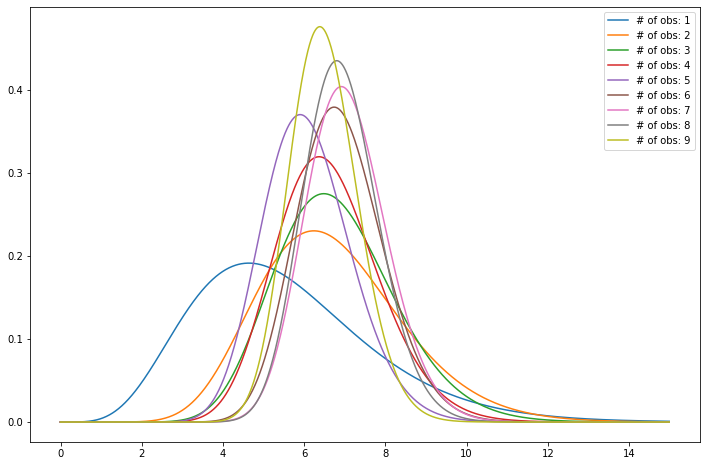

Mean and std with 1 obs: (5.55, 2.25)
Mean and std with 2 obs: (6.71, 1.79)
Mean and std with 3 obs: (6.81, 1.48)
Mean and std with 4 obs: (6.61, 1.27)
Mean and std with 5 obs: (6.1, 1.09)
Mean and std with 6 obs: (6.9, 1.06)
Mean and std with 7 obs: (7.06, 1.0)
Mean and std with 8 obs: (6.93, 0.92)
Mean and std with 9 obs: (6.49, 0.84)


In [25]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

data = [6, 8, 7, 6, 4, 11, 8, 6, 3]
a_prior, b_prior = 0.1, 0.1
theta_val = np.arange(0, 15, 0.01)

mean = []
std = []

plt.figure(figsize=(12,8))
for i in range(len(data)):
    n = len(data[:i+1])
    a_new = a_prior + sum(data[:i+1])
    b_new = b_prior + n
    model = stats.gamma.pdf(x=theta_val, a=a_new, scale=1/b_new)
    mean.append(stats.gamma.mean(a=a_new, scale=1/b_new))
    std.append(stats.gamma.std(a=a_new, scale=1/b_new))
    plt.plot(theta_val, model, label=f"# of obs: {i+1}")

plt.legend()
plt.show()

for i, (m, s) in enumerate(zip(mean, std)):
    print(f"Mean and std with {i+1} obs: {round(m, 2), round(s, 2)}")

As we can see, the more observations that we get, the more "confident" we are of giving the right answer. We can see this beacuse our std is shrinking and our curve is getting sharper. 

## (e)

Now try with a $Gamma(0.5, 50)$ prior!

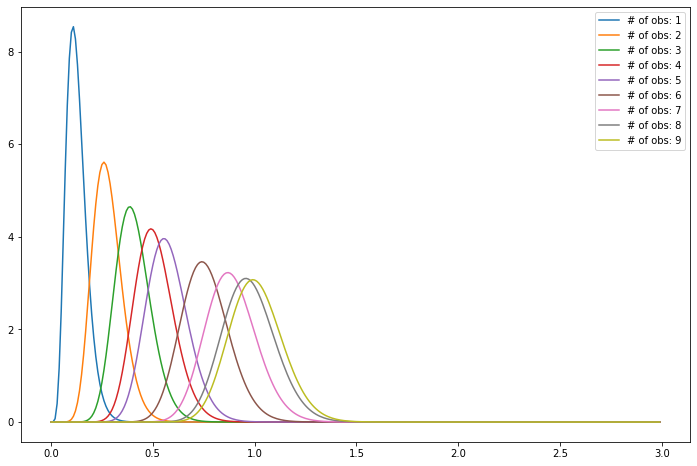

Mean and std with 1 obs: (0.13, 0.05)
Mean and std with 2 obs: (0.28, 0.07)
Mean and std with 3 obs: (0.41, 0.09)
Mean and std with 4 obs: (0.51, 0.1)
Mean and std with 5 obs: (0.57, 0.1)
Mean and std with 6 obs: (0.76, 0.12)
Mean and std with 7 obs: (0.89, 0.12)
Mean and std with 8 obs: (0.97, 0.13)
Mean and std with 9 obs: (1.01, 0.13)


In [28]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

data = [6, 8, 7, 6, 4, 11, 8, 6, 3]
a_prior, b_prior = 0.5, 50
theta_val = np.arange(0, 3, 0.01)

mean = []
std = []

plt.figure(figsize=(12,8))
for i in range(len(data)):
    n = len(data[:i+1])
    a_new = a_prior + sum(data[:i+1])
    b_new = b_prior + n
    model = stats.gamma.pdf(x=theta_val, a=a_new, scale=1/b_new)
    mean.append(stats.gamma.mean(a=a_new, scale=1/b_new))
    std.append(stats.gamma.std(a=a_new, scale=1/b_new))
    plt.plot(theta_val, model, label=f"# of obs: {i+1}")

plt.legend()
plt.show()

for i, (m, s) in enumerate(zip(mean, std)):
    print(f"Mean and std with {i+1} obs: {round(m, 2), round(s, 2)}")

Since we set such a "confident" prior (very high b value) we get a model that need alot more than 9 observations to find the "true" mean. Even with enought observations, it is not given that we'll reach the "true mean" of our unknown parameter $\theta$.